In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import glob
import string
import statistics
from os.path import exists
from pydicom import dcmread
import datetime
import statsmodels.formula.api as smf
import scipy

In [2]:
curr_path = '/Users/madisonhunt/Desktop/SAMS_3T_Vol.csv'

vol_data = pd.DataFrame()
vol_data= pd.read_csv(curr_path)

In [3]:
vol_data.head()

,blind_num,R-PRC,R-ERC,R-PHC,R-Sub,R-ant-HC,R-CA1,R-DG/CA3,R-post-HC,L-PRC,L-ERC,L-PHC,L-Sub,L-ant-HC,L-CA1,L-DG/CA3,L-post-HC
0,blind046,1098.229,953.842,2371.865,327.918,2058.718,315.362,619.277,329.395,1485.231,1042.099,2395.868,436.854,1772.898,322.748,596.013,196.825
1,blind103,1202.416,1112.678,1802.886,534.736,1688.775,280.662,362.645,322.023,1299.171,1150.346,1864.927,565.018,1500.066,313.160,406.960,319.807
2,blind115,1649.606,1612.678,1826.495,495.953,2327.618,266.625,316.479,387.752,1973.102,998.184,1554.330,310.940,1858.623,217.510,374.457,371.503
3,blind169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,blind093,1577.987,1564.692,2400.032,640.353,1960.205,265.891,386.280,291.002,894.796,999.305,2781.880,586.806,1529.240,292.480,364.492,411.392


In [4]:
curr_path = '/Users/madisonhunt/Desktop/SAMS_FSL_output.csv'

fsl_data = pd.DataFrame()
fsl_data = pd.read_csv(curr_path)


In [5]:
fsl_data.head()

,Subject,gray_Volume,gray_Unnormalised-Volume,white_Volume,white_Unnormalised-Volume,brain_Volume,brain_Unnormalised-Volume,Amcode,PIDN,BlindCode,Unnamed: 10,63
0,sub-020,654816.23,482635.36,668475.75,492703.18,1323291.98,975338.54,am20,423.0,blind003,False,NaN
1,sub-028,625501.02,481856.15,682248.76,525571.90,1307749.78,1007428.05,am28,NaN,NaN,True,NaN
2,sub-029,631584.40,469990.82,603811.73,449323.91,1235396.13,919314.73,am29,NaN,NaN,True,NaN
3,sub-030,589928.03,491171.31,689791.45,574317.13,1279719.48,1065488.44,am30,NaN,NaN,True,NaN
4,sub-031,784457.06,498990.03,745925.36,474480.17,1530382.42,973470.20,am31,481.0,blind007,False,NaN


In [6]:
curr_path = ('/Users/madisonhunt/Desktop/SAMS_id_data.csv')

id_match = pd.DataFrame()
id_match = pd.read_csv(curr_path)

In [7]:
id_match.head()

,pidn,Amcode,blind_num
0,301,am24,blind009
1,303,am29,blind008
2,405,am13,blind168
3,423,am20,blind003
4,448,am25,blind004


In [8]:
curr_path = ('/Users/madisonhunt/Desktop/mst_data.csv')

mst_data = pd.DataFrame()
mst_data = pd.read_csv(curr_path)

In [9]:
mst_data.head()

,pidn,num_targ_tr,num_foil_tr,num_lure_tr,num_nr,num_nr_t,num_nr_l,num_nr_f,prop_nr,n_old_targ,...,lm2,lmpr,mmse_norm,hvltr4_norm,bvmtr4_norm,lm2_norm,immediate_recall_comp,delayed_recall_comp,recognition_comp,nr_group
0,449,63,63,63,15,5,7,3,0.078125,55,...,33.0,89.0,0.986161,0.461898,0.992866,0.338361,0.871160,0.597709,-0.311304,nr_.05
1,456,63,64,63,11,2,3,6,0.057292,50,...,37.0,86.0,0.986161,-0.076983,0.027327,0.919985,0.471109,0.290109,0.262036,nr_.05
2,457,64,64,64,2,0,0,2,0.010417,49,...,30.0,86.0,0.986161,-0.076983,0.510096,-0.097856,-0.162737,0.111752,-0.145195,nr_low
3,468,63,64,64,5,3,0,2,0.026042,38,...,18.0,62.0,-1.043887,-0.615864,-1.420982,-1.842726,-0.647130,-1.293191,-0.695494,nr_low
4,470,64,64,64,4,0,2,2,0.020833,63,...,32.0,82.0,0.986161,-1.693627,-0.455443,0.192956,0.114617,-0.652038,-0.265756,nr_low


In [10]:
data = id_match.merge(vol_data, on = 'blind_num')
data.head()

,pidn,Amcode,blind_num,R-PRC,R-ERC,R-PHC,R-Sub,R-ant-HC,R-CA1,R-DG/CA3,R-post-HC,L-PRC,L-ERC,L-PHC,L-Sub,L-ant-HC,L-CA1,L-DG/CA3,L-post-HC
0,301,am24,blind009,1752.664,825.370,1611.594,645.155,1668.096,245.211,406.222,93.431,1276.646,810.598,1933.987,530.674,1283.293,280.293,437.612,271.800
1,303,am29,blind008,1711.675,1181.739,1994.185,599.733,1931.036,224.900,335.318,272.908,1758.576,1330.564,2293.313,634.446,1883.397,243.734,391.082,104.879
2,405,am13,blind168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,423,am20,blind003,1069.816,1185.032,2274.051,494.471,1526.620,295.427,420.984,423.199,1108.960,1246.333,2619.701,502.965,1332.377,271.793,461.605,429.477
4,448,am25,blind004,1044.048,1221.319,2035.285,594.225,1875.742,321.302,493.772,351.955,1362.396,1265.267,2102.500,612.691,1760.885,262.582,471.982,357.495


In [11]:
data = data.merge(fsl_data, on = 'Amcode')
data.head()

,pidn,Amcode,blind_num,R-PRC,R-ERC,R-PHC,R-Sub,R-ant-HC,R-CA1,R-DG/CA3,...,gray_Volume,gray_Unnormalised-Volume,white_Volume,white_Unnormalised-Volume,brain_Volume,brain_Unnormalised-Volume,PIDN,BlindCode,Unnamed: 10,63
0,303,am29,blind008,1711.675,1181.739,1994.185,599.733,1931.036,224.900,335.318,...,631584.40,469990.82,603811.73,449323.91,1235396.13,919314.73,NaN,NaN,True,NaN
1,423,am20,blind003,1069.816,1185.032,2274.051,494.471,1526.620,295.427,420.984,...,654816.23,482635.36,668475.75,492703.18,1323291.98,975338.54,423.0,blind003,False,NaN
2,457,am34,blind010,1601.589,1279.942,1987.861,577.931,1709.789,260.346,358.206,...,609064.80,452423.06,661479.13,491357.26,1270543.93,943780.32,457.0,blind010,False,NaN
3,472,am35,blind013,1473.480,1214.975,1165.490,443.152,1387.435,191.294,425.426,...,626476.31,450413.04,665998.24,478827.83,1292474.55,929240.87,NaN,NaN,True,NaN
4,474,am44,blind015,968.635,1087.914,1987.862,515.153,1350.106,227.110,443.511,...,663982.95,468972.53,757419.21,534966.76,1421402.16,1003939.29,474.0,blind015,False,NaN


In [12]:
volumes = pd.DataFrame()
volumes['pidn'] = data['pidn']


volumes['r_prc_vol'] = data['R-PRC']
volumes['r_erc_vol'] = data['R-ERC']
volumes['r_phc_vol'] = data['R-PHC']
volumes['r_sub_vol'] = data['R-Sub']
volumes['r_ant_vol'] = data['R-ant-HC']
volumes['r_ca1_vol'] = data['R-CA1']
volumes['r_dg_ca3_vol'] = data['R-DG/CA3']
volumes['r_post_vol'] = data['R-post-HC']
volumes['l_prc_vol'] = data['L-PRC']
volumes['l_erc_vol'] = data['L-ERC']
volumes['l_phc_vol'] = data['L-PHC']
volumes['l_sub_vol'] = data['L-Sub']
volumes['l_ant_vol'] = data['L-ant-HC']
volumes['l_ca1_vol'] = data['L-CA1']
volumes['l_dg_ca3_vol'] = data['L-DG/CA3']
volumes['l_post_vol'] = data['L-post-HC']
volumes['r_sub_vol'] = data['R-Sub']
volumes['l_sub_vol'] = data['L-Sub']
volumes['brain_vol'] = data['brain_Volume']

In [13]:
print(volumes)

     pidn  r_prc_vol  r_erc_vol  r_phc_vol  r_sub_vol  r_ant_vol  r_ca1_vol  \
0     303   1711.675   1181.739   1994.185    599.733   1931.036    224.900   
1     423   1069.816   1185.032   2274.051    494.471   1526.620    295.427   
2     457   1601.589   1279.942   1987.861    577.931   1709.789    260.346   
3     472   1473.480   1214.975   1165.490    443.152   1387.435    191.294   
4     474    968.635   1087.914   1987.862    515.153   1350.106    227.110   
5     475   1042.850   1208.657   2001.504    435.382   1503.713    278.807   
6     477   1052.073   1210.862   2684.281    727.847   1650.672    356.353   
7     478   1387.081   1472.020   2346.885    564.656   1556.589    304.670   
8     479   1685.028   1296.545   1384.064    259.604   1511.836    183.533   
9     481    884.432    820.916   1867.832    591.222   1585.331    279.547   
10    482   1398.847   1404.756   1887.041    647.355   1377.798    303.551   
11    488    973.053   1373.352   2088.278    668.76

In [14]:
volumes = volumes.merge(mst_data, on = 'pidn')
volumes.head()

,pidn,r_prc_vol,r_erc_vol,r_phc_vol,r_sub_vol,r_ant_vol,r_ca1_vol,r_dg_ca3_vol,r_post_vol,l_prc_vol,...,lm2,lmpr,mmse_norm,hvltr4_norm,bvmtr4_norm,lm2_norm,immediate_recall_comp,delayed_recall_comp,recognition_comp,nr_group
0,457,1601.589,1279.942,1987.861,577.931,1709.789,260.346,358.206,346.020,1478.248,...,30.0,86.0,0.986161,-0.076983,0.510096,-0.097856,-0.162737,0.111752,-0.145195,nr_low
1,472,1473.480,1214.975,1165.490,443.152,1387.435,191.294,425.426,350.459,1544.754,...,30.0,94.0,0.986161,1.000779,0.027327,-0.097856,0.331262,0.310083,0.307584,nr_.05
2,474,968.635,1087.914,1987.862,515.153,1350.106,227.110,443.511,418.769,972.697,...,44.0,100.0,0.986161,-0.076983,0.992866,1.937825,0.742234,0.951236,0.594253,nr_low
3,475,1042.850,1208.657,2001.504,435.382,1503.713,278.807,458.647,199.412,1335.690,...,18.0,67.0,-1.043887,-0.615864,-1.903752,-1.842726,-1.179196,-1.454114,-0.477413,nr_.05
4,477,1052.073,1210.862,2684.281,727.847,1650.672,356.353,533.237,584.567,1025.115,...,30.0,94.0,-0.028863,-0.615864,0.992866,-0.097856,0.179932,0.093049,0.141475,nr_low


In [15]:
statistics.mean(volumes['np_age'])

67.856

In [16]:
statistics.stdev(volumes['np_age'])

5.656432250672823

In [17]:
volumes['ca1_vol'] = volumes['r_ca1_vol'] + volumes['l_ca1_vol']
volumes['dg_ca3_vol'] = volumes['r_dg_ca3_vol'] + volumes['l_dg_ca3_vol']
volumes['sub_vol'] = volumes['r_sub_vol'] +volumes['l_sub_vol']
volumes['prc_vol'] = volumes['r_prc_vol'] +volumes['l_prc_vol']
volumes['erc_vol'] = volumes['r_erc_vol'] + volumes['l_erc_vol']
volumes['phc_vol'] = volumes['r_phc_vol'] + volumes['l_phc_vol']
volumes['ant_vol'] = volumes['r_ant_vol'] +volumes['l_ant_vol']
volumes['post_vol'] = volumes['r_post_vol'] + volumes['l_post_vol'] 
volumes['sub_vol'] =volumes['r_sub_vol']+volumes['l_sub_vol']
volumes['hc_vol'] = volumes['ca1_vol'] + volumes['dg_ca3_vol'] + volumes['sub_vol'] + volumes['ant_vol'] + volumes['post_vol']

non_nan_volumes = volumes.dropna()
norm_volumes=pd.DataFrame()
norm_volumes['ca1_vol'] = scipy.stats.zscore(non_nan_volumes['ca1_vol'], axis = None)
norm_volumes['dg_ca3_vol'] = scipy.stats.zscore(non_nan_volumes['dg_ca3_vol'], axis = None)
norm_volumes['sub_vol'] = scipy.stats.zscore(non_nan_volumes['sub_vol'], axis = None)
norm_volumes['ant_vol'] = scipy.stats.zscore(non_nan_volumes['ant_vol'], axis = None)
norm_volumes['post_vol'] = scipy.stats.zscore(non_nan_volumes['post_vol'], axis = None)
norm_volumes['hc_vol'] = scipy.stats.zscore(non_nan_volumes['hc_vol'], axis = None)
norm_volumes['brain_vol'] = scipy.stats.zscore(non_nan_volumes['brain_vol'], axis = None)
norm_volumes['np_age'] = scipy.stats.zscore(non_nan_volumes['np_age'], axis = None)
norm_volumes['yrs_educ'] = scipy.stats.zscore(non_nan_volumes['yrs_educ'], axis = None)
norm_volumes['gender'] = non_nan_volumes['gender']
norm_volumes['dprime_bps'] = non_nan_volumes['dprime_bps']
norm_volumes['bps'] = non_nan_volumes['bps']
norm_volumes['dprime_old_new'] = non_nan_volumes['dprime_old_new']
norm_volumes['old_targ_old_foil'] = non_nan_volumes['old_targ_old_foil']
print(norm_volumes)

      ca1_vol  dg_ca3_vol   sub_vol   ant_vol  post_vol    hc_vol  brain_vol  \
0   -0.291904   -0.388946  1.222244  0.202292 -1.494944 -0.119727  -0.936985   
1   -1.422972   -0.436679 -0.907711 -1.343750  0.406506 -1.411737  -0.686572   
2   -0.766019    0.185141  0.107790 -1.023498  0.367678 -0.673514   0.785576   
3   -0.549549    0.028517 -0.819774 -0.024296 -1.301267 -0.731476  -0.832214   
4    1.996406    1.089635  1.648130 -0.102090  1.963664  1.530471   1.291026   
5    0.406406   -0.430101  0.246374 -0.353783  0.642099 -0.032617   1.661741   
6   -1.676968   -1.798090 -1.928830 -0.461265 -1.761496 -2.082517   0.473542   
7   -0.213536   -0.893466  0.438501 -0.481341 -1.654568 -1.002844   2.029957   
8    0.182192   -0.675996  0.812397 -0.784255 -0.583787 -0.677034  -0.691137   
9    0.682380    1.563717  1.736243  0.559419 -0.800757  1.090497  -0.512153   
10  -0.960077   -0.645469 -0.618331  0.369277 -1.353896 -0.609021   0.394534   
11   1.152866    0.722277 -0.199566 -0.5

/Users/madisonhunt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(7.924999999999997, 0.5, 'Norm DG/CA3 Vol')

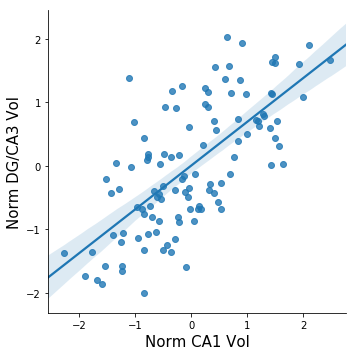

In [18]:

sns.lmplot(x='ca1_vol', y='dg_ca3_vol', data = norm_volumes)
plt.xlabel('Norm CA1 Vol', fontsize=15)
plt.ylabel('Norm DG/CA3 Vol', fontsize=15)

In [19]:
scipy.stats.pearsonr(x=norm_volumes['ca1_vol'], y=norm_volumes['dg_ca3_vol'])

(0.6903317841482741, 3.756729375235384e-17)

In [20]:
d_old_new_ca1_controlled_results = smf.ols('dprime_old_new ~ ca1_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
d_old_new_ca1_controlled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         dprime_old_new   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.6018
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.699
Time:                        09:34:23   Log-Likelihood:                -96.097
No. Observations:                 107   AIC:                             204.2
Df Residuals:                     101   BIC:                             220.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7384      0.076     36.096      0.000       2.588       2.889
ca1_vol        0.0822      0.064      1.294      0.199      -0.044       0.208
brain_vol      0.0351      0.070      0.501      0.618      -0.104       0.174
np_age         0.0777      0.073      1.058      0.293      -0.068       0.224
yrs_educ       0.0398      0.060      0.665      0.507      -0.079       0.158
gender        -0.0362      0.127     -0.284      0.777      -0.289       0.216
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.177
Skew:                          -0.028   Prob(JB):                        0.915
Kurtosis:                       3.191   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(6.674999999999997, 0.5, "Old/New Recog d'")

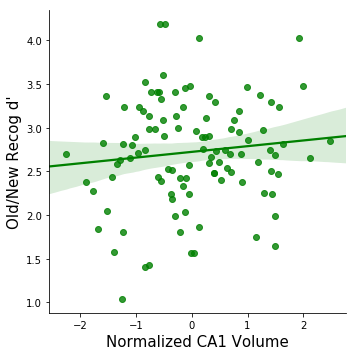

In [31]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
d_old_new_ca1_controlled_model = smf.ols('ca1_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
norm_volumes['d_old_new_ca1_vol_residuals'] = pd.DataFrame(d_old_new_ca1_controlled_model.fittedvalues.values)

sns.lmplot(x='ca1_vol', y = 'dprime_old_new', data=norm_volumes, scatter_kws={'color':'green'}, line_kws={'color':'green'})
plt.xlabel('Normalized CA1 Volume', fontsize = 15)
plt.ylabel('Old/New Recog d\'', fontsize = 15)



In [22]:

scipy.stats.pearsonr(x=norm_volumes['d_old_new_ca1_vol_residuals'], y=norm_volumes['dprime_old_new'])

(nan, 1.0)

In [23]:

d_old_new_dg_ca3_controlled_results = smf.ols('dprime_old_new ~ dg_ca3_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
d_old_new_dg_ca3_controlled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         dprime_old_new   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.4754
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.794
Time:                        09:34:23   Log-Likelihood:                -96.423
No. Observations:                 107   AIC:                             204.8
Df Residuals:                     101   BIC:                             220.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7404      0.076     36.011      0.000       2.589       2.891
dg_ca3_vol     0.0628      0.061      1.025      0.308      -0.059       0.184
brain_vol      0.0342      0.071      0.485      0.629      -0.106       0.174
np_age         0.0626      0.071      0.878      0.382      -0.079       0.204
yrs_educ       0.0407      0.060      0.679      0.499      -0.078       0.160
gender        -0.0398      0.128     -0.311      0.757      -0.293       0.214
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.074
Skew:                          -0.022   Prob(JB):                        0.964
Kurtosis:                       3.121   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/madisonhunt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(6.674999999999997, 0.5, "Old/New d'")

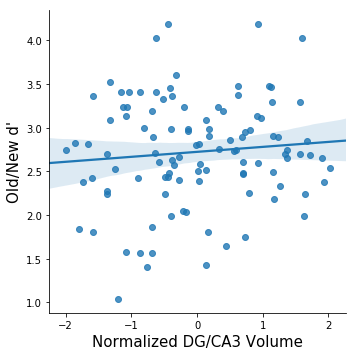

In [30]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
d_old_new_dg_ca3_controlled_model = smf.ols('dg_ca3_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
norm_volumes['d_old_new_dg_ca3_vol_residuals'] = pd.DataFrame(d_old_new_dg_ca3_controlled_model.fittedvalues.values)

sns.lmplot(x='dg_ca3_vol', y = 'dprime_old_new', data= norm_volumes)
plt.xlabel('Normalized DG/CA3 Volume', fontsize = 15)
plt.ylabel('Old/New d\'', fontsize = 15)

In [25]:
scipy.stats.pearsonr(x=norm_volumes['d_old_new_dg_ca3_vol_residuals'], y=norm_volumes['dprime_old_new'])

(nan, 1.0)

In [26]:

d_old_new_hc_controlled_results = smf.ols('dprime_old_new ~ hc_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
d_old_new_hc_controlled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         dprime_old_new   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.4912
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.782
Time:                        09:34:23   Log-Likelihood:                -96.382
No. Observations:                 107   AIC:                             204.8
Df Residuals:                     101   BIC:                             220.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7455      0.076     36.254      0.000       2.595       2.896
hc_vol         0.0651      0.061      1.062      0.291      -0.056       0.187
brain_vol      0.0296      0.070      0.423      0.673      -0.109       0.168
np_age         0.0612      0.071      0.864      0.389      -0.079       0.202
yrs_educ       0.0342      0.061      0.562      0.575      -0.087       0.155
gender        -0.0542      0.126     -0.429      0.669      -0.305       0.196
==============================================================================
Omnibus:                        0.615   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.235
Skew:                          -0.036   Prob(JB):                        0.889
Kurtosis:                       3.218   Cond. No.                         2.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

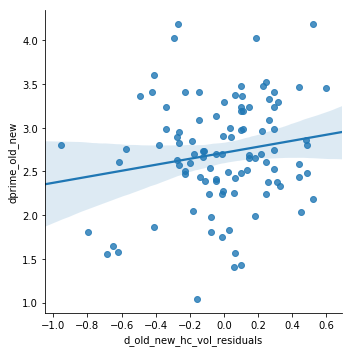

In [27]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
d_old_new_hc_controlled_model = smf.ols('hc_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
norm_volumes['d_old_new_hc_vol_residuals'] = pd.DataFrame(d_old_new_hc_controlled_model.fittedvalues.values)

sns.lmplot(x='d_old_new_hc_vol_residuals', y = 'dprime_old_new', data=norm_volumes)


In [28]:

old_new_ca1_controlled_results = smf.ols('old_targ_old_foil ~ ca1_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
old_new_ca1_controlled_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      old_targ_old_foil   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.251
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.291
Time:                        09:34:24   Log-Likelihood:                 71.397
No. Observations:                 107   AIC:                            -130.8
Df Residuals:                     101   BIC:                            -114.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7784      0.016     49.091      0.000       0.747       0.810
ca1_vol        0.0213      0.013      1.606      0.111      -0.005       0.048
brain_vol      0.0056      0.015      0.384      0.702      -0.023       0.035
np_age         0.0173      0.015      1.125      0.263      -0.013       0.048
yrs_educ       0.0093      0.012      0.748      0.456      -0.015       0.034
gender        -0.0325      0.027     -1.222      0.225      -0.085       0.020
==============================================================================
Omnibus:                       15.662   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.639
Skew:                          -0.889   Prob(JB):                     0.000148
Kurtosis:                       3.890   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
old_new_ca1_controlled_model = smf.ols('ca1_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
norm_volumes['old_new_ca1_vol_residuals'] = old_new_ca1_controlled_model.fittedvalues.values

sns.lmplot(x='old_new_ca1_vol_residuals', y = 'old_targ_old_foil', data=norm_volumes)

ValueError: Length of values does not match length of index

In [ ]:

old_new_dg_ca3_controlled_results = smf.ols('old_targ_old_foil ~ dg_ca3_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
old_new_dg_ca3_controlled_results.summary()

In [ ]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
old_new_dg_ca3_controlled_model = smf.ols('dg_ca3_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
norm_volumes['old_new_dg_ca3_vol_residuals'] = old_new_dg_ca3_controlled_model.fittedvalues.values

sns.lmplot(x='old_new_dg_ca3_vol_residuals', y = 'old_targ_old_foil', data=norm_volumes)

In [ ]:

old_new_hc_controlled_results = smf.ols('old_targ_old_foil ~ hc_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
old_new_hc_controlled_results.summary()

In [ ]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
old_new_hc_controlled_model = smf.ols('hc_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
norm_volumes['old_new_hc_vol_residuals'] = old_new_hc_controlled_model.fittedvalues.values
sns.lmplot(x='old_new_hc_vol_residuals', y = 'old_targ_old_foil', data=norm_volumes)

In [ ]:

d_bps_ca1_controlled_results = smf.ols('dprime_bps ~ ca1_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
d_bps_ca1_controlled_results.summary()


Text(-1.5750000000000028, 0.5, "Lure Discrimination d'")

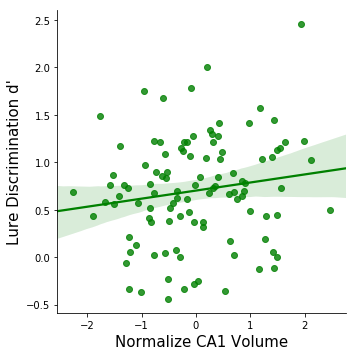

In [33]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
d_bps_ca1_controlled_model = smf.ols('ca1_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
# norm_volumes['d_bps_ca1_vol_residuals'] = d_bps_ca1_controlled_model.fittedvalues.values
# # get visualization libraries
sns.lmplot(x='ca1_vol', y = 'dprime_bps', data=norm_volumes, scatter_kws={'color':'green'}, line_kws={'color':'green'})
plt.xlabel('Normalize CA1 Volume', fontsize=15)
plt.ylabel('Lure Discrimination d\'', fontsize=15)

In [ ]:

d_bps_dg_ca3_controlled_results = smf.ols('dprime_bps ~ dg_ca3_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
d_bps_dg_ca3_controlled_results.summary()

Text(-1.5750000000000028, 0.5, "Lure Discrimination d'")

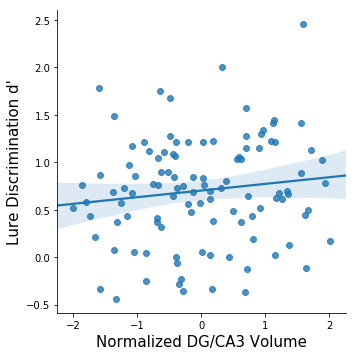

In [34]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
d_bps_dg_ca3_controlled_model = smf.ols('dg_ca3_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
# norm_volumes['d_bps_dg_ca3_vol_residuals'] = d_bps_dg_ca3_controlled_model.fittedvalues.values
# get visualization libraries
sns.lmplot(x='dg_ca3_vol', y = 'dprime_bps', data=norm_volumes)
plt.xlabel('Normalized DG/CA3 Volume', fontsize=15)
plt.ylabel('Lure Discrimination d\'', fontsize=15)

In [ ]:

d_bps_hc_controlled_results = smf.ols('dprime_bps ~ hc_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
d_bps_hc_controlled_results.summary()

In [ ]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
d_bps_hc_controlled_model = smf.ols('hc_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
norm_volumes['d_bps_hc_vol_residuals'] = d_bps_hc_controlled_model.fittedvalues.values
# get visualization libraries
sns.lmplot(x='d_bps_hc_vol_residuals', y = 'dprime_bps', data=norm_volumes)

In [ ]:

bps_ca1_controlled_results = smf.ols('bps ~ ca1_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
bps_ca1_controlled_results.summary()


In [ ]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
bps_ca1_controlled_model = smf.ols('ca1_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
norm_volumes['bps_ca1_vol_residuals'] = bps_ca1_controlled_model.fittedvalues.values

sns.lmplot(x='bps_ca1_vol_residuals', y = 'dprime_bps', data=norm_volumes) 

In [ ]:

bps_dg_ca3_controlled_results = smf.ols('bps ~ dg_ca3_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
bps_dg_ca3_controlled_results.summary()

In [ ]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
bps_dg_ca3_controlled_model = smf.ols('dg_ca3_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
norm_volumes['bps_dg_ca3_vol_residuals'] = bps_dg_ca3_controlled_model.fittedvalues.values

sns.lmplot(x='bps_dg_ca3_vol_residuals', y = 'dprime_bps', data=norm_volumes)

In [ ]:

bps_hc_controlled_results = smf.ols('bps ~ hc_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
bps_hc_controlled_results.summary()

In [ ]:
 # now lets get extract all the variance from r_cal_vol that we can explain with np_age + yrs_educ + gender
bps_hc_controlled_model = smf.ols('hc_vol ~ np_age + yrs_educ + gender', data = norm_volumes).fit()
# and extract the residuals into vector form
norm_volumes['bps_hc_vol_residuals'] = bps_hc_controlled_model.fittedvalues.values

sns.lmplot(x='bps_hc_vol_residuals', y = 'dprime_bps', data=norm_volumes)

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('bps ~ r_ca1_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('bps ~ l_ca1_vol + brain_vol + np_age + yrs_educ + gender', data = norm_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('bps ~ r_dg_ca3_vol + brain_vol + np_age + yrs_educ + gender', data = non_nan_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('bps ~ l_dg_ca3_vol + brain_vol + np_age + yrs_educ + gender', data = non_nan_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('dprime_bps ~ r_ca1_vol + brain_vol + np_age + yrs_educ + gender', data = non_nan_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('dprime_bps ~ l_ca1_vol + brain_vol + np_age + yrs_educ + gender', data = non_nan_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('dprime_bps ~ r_dg_ca3_vol + brain_vol + np_age + yrs_educ + gender', data = non_nan_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('dprime_bps ~ l_dg_ca3_vol + brain_vol + np_age + yrs_educ + gender', data = non_nan_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('old_targ_old_foil ~ r_ca1_vol + brain_vol + np_age + yrs_educ + gender', data = non_nan_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('old_targ_old_foil ~ l_ca1_vol + brain_vol + np_age + yrs_educ + gender', data = non_nan_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:

# buid the model between bps and r_cal_vol controlling for np_age, yrs_educ, and gender
bps_ca1_controlled_results = smf.ols('old_targ_old_foil ~ r_dg_ca3_vol + brain_vol + np_age + yrs_educ + gender', data = non_nan_volumes).fit()
# print model summary
bps_ca1_controlled_results.summary()

In [ ]:
## Code that tyler used to plot and i don't want to lose
# get visualization libraries
# %pylab inline
 # square-ish plot
# plt.figure(figsize=[4.5, 4])
# # plot x = residuals y = bps
# plt.scatter(x=d_old_new_ca1_vol_residuals, y=non_nan_volumes['dprime_old_new'])
# plt.xlabel('d\' old/new CA1 Volume Residuals')
# plt.ylabel('d\' old/new')